In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline 


sd = pd.read_csv('/supermarket_data.csv')

In [110]:
sd.head()

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND
0,20071006,21,994107800268406,CUST0000153531,STORE00001,PRD0901391,1,0.37
1,20070201,15,994104300305853,CUST0000219191,STORE00002,PRD0901915,1,5.08
2,20071103,13,994108200514137,CUST0000526979,STORE00003,PRD0903379,1,2.36
3,20070206,18,994104400743650,CUST0000913709,STORE00004,PRD0903305,1,0.20
4,20071015,19,994108000780959,CUST0000961285,STORE00001,PRD0903387,1,1.65


Checking for null for each column

In [7]:
# data is clean of missing values 
for col in sd:
    print('Number of nulls for', col, ' = ', sd[col].isnull().sum())


Number of nulls for SHOP_DATE  =  0
Number of nulls for SHOP_HOUR  =  0
Number of nulls for BASKET_ID  =  0
Number of nulls for CUST_CODE  =  0
Number of nulls for STORE_CODE  =  0
Number of nulls for PROD_CODE  =  0
Number of nulls for QUANTITY  =  0
Number of nulls for SPEND  =  0


Let's see the date range of the data and the lets sort the dataset by most historic to recent

In [138]:
print('Min date =', sd['SHOP_DATE'].min())
print('Max date =', sd['SHOP_DATE'].max())
print('Date range is',sd['SHOP_DATE'].max() - sd['SHOP_DATE'].min(),'(Equivalent to about 1 year and a half)')
sd = sd.sort_values('SHOP_DATE')

Min date = 20070101
Max date = 20080706
Date range is 10605 (Equivalent to about 1 year and a half)


In [15]:
sd

,SHOP_DATE,SHOP_HOUR,BASKET_ID,CUST_CODE,STORE_CODE,PROD_CODE,QUANTITY,SPEND
248967,20070101,11,994103900363121,CUST0000398965,STORE00001,PRD0903245,3,4.35
517878,20070101,16,994103900517640,CUST0000677696,STORE00003,PRD0901300,1,0.81
476140,20070101,15,994103900203675,CUST0000110949,STORE00003,PRD0902277,1,0.53
44446,20070101,14,994103900209839,CUST0000122195,STORE00001,PRD0900121,1,0.98
255517,20070101,16,994103900462966,CUST0000579778,STORE00004,PRD0900775,16,2.08
548885,20070101,18,994103900174061,CUST0000057349,STORE00003,PRD0902430,3,1.92
435038,20070101,17,994103900665591,CUST0000942162,STORE00003,PRD0902045,1,4.47
44350,20070101,13,994103900536193,CUST0000710863,STORE00001,PRD0901323,1,2.15
434991,20070101,16,994103900641796,CUST0000899835,STORE00001,PRD0904917,1,1.34
434976,20070101,21,994103900549730,CUST0000735368,STORE00002,PRD0903378,1,1.70


In [ ]:
# next steps for EDA - find out unique values for columns 
# find out which store is doing the best, what product is most popular among those stores, 
# find out if there are repeated baseket ids underthe same customer for the same date for finding out whats basket id
# what are the popular shopping hours so that manager can decide what hours to do marketing campaign
# extract the most counted customer code and see if he ever shops on the same date

There are 4978 different products that are bought during this time

In [91]:
sd['PROD_CODE'].value_counts()

PRD0903052    15587
PRD0903678    14508
PRD0904358    12147
PRD0900121     8747
PRD0901265     6225
PRD0900830     4630
PRD0903228     3864
PRD0900173     3490
PRD0903074     3210
PRD0901887     2751
PRD0904250     2707
PRD0904976     2432
PRD0900531     2300
PRD0904044     2270
PRD0902029     2206
PRD0901228     2104
PRD0904887     2073
PRD0901878     1884
PRD0901672     1851
PRD0903788     1816
PRD0904962     1812
PRD0902540     1787
PRD0902728     1734
PRD0901348     1716
PRD0900254     1706
PRD0903269     1689
PRD0900302     1639
PRD0902808     1573
PRD0903806     1547
PRD0903993     1546
              ...  
PRD0904491        3
PRD0900625        3
PRD0902999        3
PRD0901040        3
PRD0900072        3
PRD0903648        3
PRD0903453        3
PRD0904769        2
PRD0903803        2
PRD0902196        2
PRD0903006        2
PRD0903555        2
PRD0901731        2
PRD0900909        2
PRD0904007        2
PRD0902172        2
PRD0904734        2
PRD0903056        2
PRD0904997        2


There are 4891 different customers that showed up during this time

In [24]:
sd['CUST_CODE'].value_counts()

137.37763238601514

Question :What are the monthly revenues for the supermarket? This can be used to gauge which month the company is performing well or not.

In [139]:
# set index to 'shopdate' and convert it to date time index
d = []

for i,v in sd['SHOP_DATE'].iteritems():
    d.append(str(v))
sd['SHOP_DATE'] = d
sd = sd.set_index('SHOP_DATE')
sd.index = pd.to_datetime(sd.index)



In [165]:
monthlyRev = sd.groupby(pd.Grouper(freq = 'M'))
monthlyRev = monthlyRev['SPEND'].sum()
monthlyRev

SHOP_DATE
2007-01-31    65310.76
2007-02-28    60890.61
2007-03-31    70586.21
2007-04-30    67388.26
2007-05-31    69085.60
2007-06-30    71792.28
2007-07-31    73254.93
2007-08-31    70229.05
2007-09-30    69175.50
2007-10-31    67801.07
2007-11-30    68566.23
2007-12-31    73869.64
2008-01-31    62604.35
2008-02-29    62663.21
2008-03-31    69055.86
2008-04-30    66829.31
2008-05-31    72181.77
2008-06-30    70697.94
2008-07-31    12936.79
Freq: M, Name: SPEND, dtype: float64

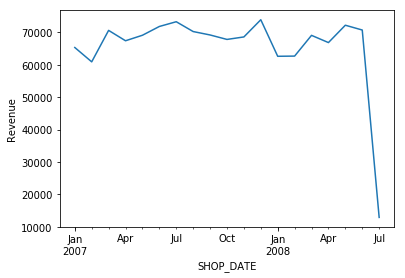

In [167]:
# plt.bar(x = monthlyRev.index, height = monthlyRev)
# plt.xticks(monthlyRev.index, rotation=45)

monthlyRev.plot()
plt.ylabel('Revenue')
plt.show()

You can see that for some reason, during February, the revenue seems to drop. This maybe due to relactance of people to spend on grocery goods since January is usally the time for people to pay off any credits and debt and also a time to buy new extravagant products (like furnitures) since it's right after New Year time. Some people would be spending their money on vacactions too. 

Question : Manager might want to know which products are the popular and what products is doing bad and should be discard?

In [33]:
# lets see the mean, median, and mode 
print(sd['PROD_CODE'].value_counts().mean())
print(sd['PROD_CODE'].value_counts().median())
print(sd['PROD_CODE'].value_counts().mode())

134.976697468863
66.0
0    40
dtype: int64


The median is 66 so lets see how many products have value count under that.

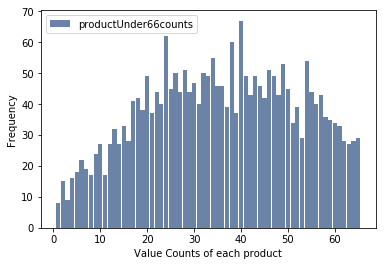

In [45]:
productU66 = sd['PROD_CODE'].value_counts()[sd['PROD_CODE'].value_counts() < 66]
# number of these products are about half of the total different products available so we cannot possibly discard them all
# lets see on a histogram
import thinkstats2
import thinkplot
hist = thinkstats2.Hist(productU66, label='productUnder66counts')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Value Counts of each product', ylabel='Frequency')

The distribution is abit skewed to the left which is good because these can be considered to be outliers.
Frequency in this case corresponds to a type of product. 
This is the result from a date range of 1 year and a half, so I will discard any products that have value count less than 10. I consider this as a threshold for outliers. Below is the list of products to discard. 
Note that I'm basing on popularity not actual number profits. 


In [64]:
productU66[productU66 < 10].index
# thats 148 products out of 4978, so it should be fine 

Index(['PRD0900194', 'PRD0901882', 'PRD0900389', 'PRD0901963', 'PRD0904457',
       'PRD0901604', 'PRD0901372', 'PRD0904540', 'PRD0902827', 'PRD0904608',
       ...
       'PRD0904189', 'PRD0900558', 'PRD0900556', 'PRD0902133', 'PRD0901814',
       'PRD0903544', 'PRD0900395', 'PRD0904423', 'PRD0903450', 'PRD0904259'],
      dtype='object', length=148)

Let's see which products are doing exceptionally good and can be consiered to be popular among customers. These products can be chosen to do marketing campaigns such as discounts. For example, manager can use these products to set up a 'Buy 1 get 1 Free' campaign: buying these exceptionally popular products and getting less popular products for free to help clear out stocks'

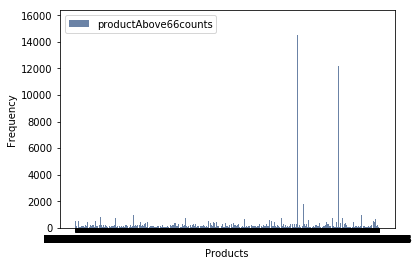

In [57]:
productA66 = sd['PROD_CODE'].value_counts()[sd['PROD_CODE'].value_counts() > 66]
listProdA66 = sd['PROD_CODE'][sd['PROD_CODE'].isin(productA66.index)]
hist = thinkstats2.Hist(listProdA66, label='productAbove66counts')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Products', ylabel='Frequency')

There are two products that doing exceptionally good compared to others, but I will present the manager the best 5 products in terms of popularity.

In [105]:
print(productA66[:5])

PRD0903052    15587
PRD0903678    14508
PRD0904358    12147
PRD0900121     8747
PRD0901265     6225
Name: PROD_CODE, dtype: int64


Question: What are the revenues and popularity of each store? Finding this will help gauge which store is under/overperforming

In [87]:
store_rev = sd.groupby('STORE_CODE')['SPEND'].sum().sort_values()
store_rev

STORE_CODE
STORE00004    212110.27
STORE00002    217743.62
STORE00001    399724.15
STORE00003    415341.33
Name: SPEND, dtype: float64

In [90]:
# Total revenue
store_rev.sum()

1244919.3700000034

I would say that store 4 and 2 is underperforming compared to others, but they constitute to about 1/6 of the total revenue, so it's safe to say they play a big role in generating income. Ofcourse, if these stores were doing very bad, they should be considered to close down. 

Now lets see how many (unique) customers are visiting each store.

In [94]:
sd.groupby('STORE_CODE')['CUST_CODE'].nunique().sort_values()

STORE_CODE
STORE00004     758
STORE00002    1187
STORE00003    1363
STORE00001    1607
Name: CUST_CODE, dtype: int64

It is quite expected that the lower amount of customers, the lower the revenue. There is a slight difference in the miss match between store 1 and 3, however, store 1 and 3's revenues are almost identical. What we have to make sure is store 1 and 3's ranking must be higher than store 4 and 2, which is ok. WE can safely conclude that store 1 and 3 is very popular and performing very well. Store 2 is underperforming, because considering its customer base, it should generate significantly more revenue than store 4. 

Question : What products are the profit drivers of each store? (Extract the top 7 from the list) 

In [103]:
# Store 4
topProd1 = sd[sd['STORE_CODE'] == 'STORE00001'].groupby('PROD_CODE')['SPEND'].sum().sort_values()[-7:]
topProd2 = sd[sd['STORE_CODE'] == 'STORE00002'].groupby('PROD_CODE')['SPEND'].sum().sort_values()[-7:]
topProd3 = sd[sd['STORE_CODE'] == 'STORE00003'].groupby('PROD_CODE')['SPEND'].sum().sort_values()[-7:]
topProd4 = sd[sd['STORE_CODE'] == 'STORE00004'].groupby('PROD_CODE')['SPEND'].sum().sort_values()[-7:]

print('STORE 1\n',topProd1)
print('STORE 2\n',topProd2)
print('STORE 3\n',topProd3)
print('STORE 4\n',topProd4)



STORE 1
 PROD_CODE
PRD0903496    1902.56
PRD0902503    2128.37
PRD0904250    2365.50
PRD0901265    3038.70
PRD0900121    3519.18
PRD0903052    3528.40
PRD0904358    7475.16
Name: SPEND, dtype: float64
STORE 2
 PROD_CODE
PRD0901348    1196.86
PRD0901265    1703.09
PRD0904250    2019.39
PRD0903052    2227.51
PRD0900121    2261.84
PRD0903269    3825.64
PRD0904358    4458.30
Name: SPEND, dtype: float64
STORE 3
 PROD_CODE
PRD0904250    2181.24
PRD0903677    2309.45
PRD0901915    3703.32
PRD0900121    3838.66
PRD0903052    3950.36
PRD0901265    4113.06
PRD0904358    7602.98
Name: SPEND, dtype: float64
STORE 4
 PROD_CODE
PRD0901265    1691.20
PRD0903052    1751.48
PRD0900401    1791.93
PRD0901915    2519.68
PRD0900121    2984.10
PRD0900883    4067.56
PRD0904358    4700.08
Name: SPEND, dtype: float64


Text(0,0.5,'SPEND')

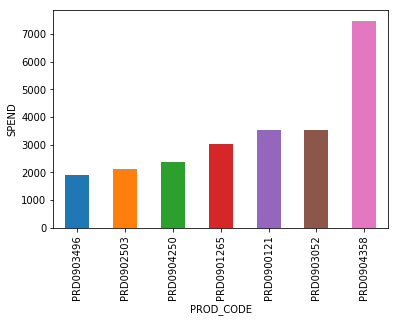

In [389]:
ax = topProd1.plot.bar()
ax.set_ylabel('SPEND')

Text(0,0.5,'SPEND')

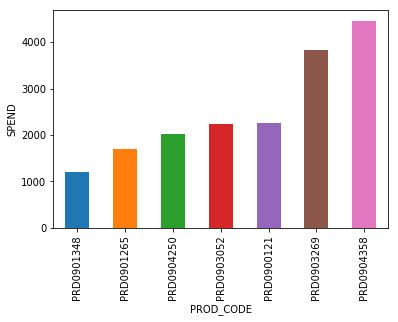

In [390]:
ax = topProd2.plot.bar()
ax.set_ylabel('SPEND')

Text(0,0.5,'SPEND')

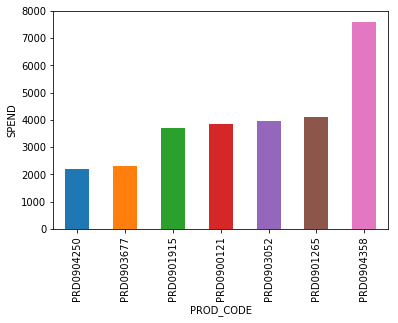

In [391]:
ax = topProd3.plot.bar()
ax.set_ylabel('SPEND')

Text(0,0.5,'SPEND')

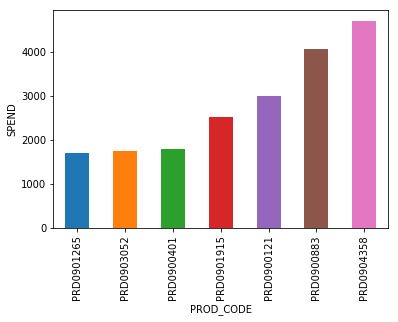

In [392]:
ax = topProd4.plot.bar()
ax.set_ylabel('SPEND')

From this data result, each store can try push up the price for their top products in order to gain more revenue. You can do this because we are certain that the customers are loyal to these products, therefore they are going to buy it anyway. 

Question : Manager wants to know who are the loyal customers so they do shopper targeting. Upon that, the manager can consider sending out 'focused' offers. 
We will now do customer segmentation based on RFM, recency frequency and monetary value. 
We will now analyze the revenue that each customer pays to supermarket (monetary value)

In [183]:
cust_spending = sd.groupby('CUST_CODE')['SPEND'].sum().sort_values()
cust_spending

CUST_CODE
CUST0000179503        0.01
CUST0000040781        0.01
CUST0000538443        0.01
CUST0000478503        0.01
CUST0000692133        0.01
CUST0000309335        0.01
CUST0000902099        0.01
CUST0000965885        0.02
CUST0000016396        0.02
CUST0000533135        0.03
CUST0000882175        0.03
CUST0000227041        0.03
CUST0000113608        0.03
CUST0000592956        0.04
CUST0000255559        0.08
CUST0000315496        0.16
CUST0000333784        0.19
CUST0000750424        0.19
CUST0000324544        0.19
CUST0000978453        0.21
CUST0000982838        0.21
CUST0000801731        0.21
CUST0000482602        0.23
CUST0000593032        0.23
CUST0000957783        0.24
CUST0000912483        0.24
CUST0000474891        0.25
CUST0000675279        0.25
CUST0000178139        0.25
CUST0000042205        0.25
                    ...   
CUST0000245035     3336.40
CUST0000997122     3384.80
CUST0000540040     3392.18
CUST0000461850     3452.82
CUST0000903324     3473.30
CUST0000923669    

Creating RFM table. We will use the most recent date as the threshold, which is 2008/07/07 according to our data. 
Note that recency is in days. 

In [186]:
NOW = pd.to_datetime('2008-07-07')
sd['Date'] = sd.index
rfmTable = sd.groupby('CUST_CODE').agg({'Date': lambda x: (NOW - x.max()).days})
rfmTable.rename(columns={'Date': 'recency'}, inplace=True)
rfmTable['recency'] = rfmTable['recency'].astype(int)
rfmTable['frequency'] = sd.groupby('CUST_CODE')['CUST_CODE'].count()
rfmTable['monetaryValue'] = sd.groupby('CUST_CODE')['SPEND'].sum()

In [185]:
rfmTable

,recency,frequency,monetaryValue
CUST_CODE,,,
CUST0000000107,104,1,0.80
CUST0000000369,2,388,545.17
CUST0000001388,87,20,21.90
CUST0000002302,4,230,492.84
CUST0000002637,38,36,48.50
CUST0000002638,450,4,15.59
CUST0000002817,21,138,418.83
CUST0000003044,530,22,32.17
CUST0000003252,94,3,3.83


Giving the score of each category based on quartile

In [193]:
# Recency score 
recency = []
for i,v in rfmTable['recency'].iteritems():
    if v <= rfmTable['recency'].quantile(.25):
        r_score = 1
    elif v > rfmTable['recency'].quantile(.25) and v <= rfmTable['recency'].quantile(.50):
        r_score = 2
    elif v > rfmTable['recency'].quantile(.50) and v <= rfmTable['recency'].quantile(.75):
        r_score = 3
    elif v > rfmTable['recency'].quantile(.75):
        r_score = 4
    recency.append(r_score)

rfmTable['r_score'] = recency    

In [195]:
# Frequency score
frequency = []
for i,v in rfmTable['frequency'].iteritems():
    if v <= rfmTable['frequency'].quantile(.25):
        f_score = 4
    elif v > rfmTable['frequency'].quantile(.25) and v <= rfmTable['frequency'].quantile(.50):
        f_score = 3
    elif v > rfmTable['frequency'].quantile(.50) and v <= rfmTable['frequency'].quantile(.75):
        f_score = 2
    elif v > rfmTable['frequency'].quantile(.75):
        f_score = 1
    frequency.append(f_score)

rfmTable['f_score'] = frequency

In [197]:
# Monetary Value score
mV = []
for i,v in rfmTable['monetaryValue'].iteritems():
    if v <= rfmTable['monetaryValue'].quantile(.25):
        mv_score = 4
    elif v > rfmTable['monetaryValue'].quantile(.25) and v <= rfmTable['monetaryValue'].quantile(.50):
        mv_score = 3
    elif v > rfmTable['monetaryValue'].quantile(.50) and v <= rfmTable['monetaryValue'].quantile(.75):
        mv_score = 2
    elif v > rfmTable['monetaryValue'].quantile(.75):
        mv_score = 1
    mV.append(mv_score)

rfmTable['mv_score'] = mV

In [199]:
# Creating RFM score
rfmTable['rfm'] = rfmTable['r_score'].astype(str) + rfmTable['f_score'].astype(str) + rfmTable['mv_score'].astype(str)

In [205]:
rfmTable

,recency,frequency,monetaryValue,r_score,f_score,mv_score,rfm
CUST_CODE,,,,,,,
CUST0000000107,104,1,0.80,3,4,4,344
CUST0000000369,2,388,545.17,1,1,1,111
CUST0000001388,87,20,21.90,3,2,3,323
CUST0000002302,4,230,492.84,1,1,1,111
CUST0000002637,38,36,48.50,2,2,2,222
CUST0000002638,450,4,15.59,4,3,3,433
CUST0000002817,21,138,418.83,2,1,1,211
CUST0000003044,530,22,32.17,4,2,2,422
CUST0000003252,94,3,3.83,3,4,4,344


RFM Score Explanation

Best Customers (111): Bought most recently, and most often, and spend the most. Marketing Action: No price incentives, just new products, and ask them to join loyalty programs

Loyal Customers (X1X): Buys very frequently. Marketing Action: Use recency and mV to further segment 

Big spenders (XX1): BIG SPENDERS. Market most expensive products.

Nearly Lost Customers (311): Haven't purchased for a while, but very frequent and spends ALOT. 

Lost Customers (411): similar to 311 but its been longer that they haven't visit the store. 
To deal with these lost customers, try to price the products down or if not send them special discounts. 

Lost Cheap Customers (444): Nothing to say much, they are worst category. Don't spend too much on trying to reacquire. 

Question: Who are the best customers? Action: From this, manager can attempt to reward them somehow since they are so loyal and they deserve some blissful gifts. This will further boost thier loyalty even more.

In [210]:
rfmTable[rfmTable['rfm'] == '111'].sort_values('monetaryValue', ascending=False).head(10)

,recency,frequency,monetaryValue,r_score,f_score,mv_score,rfm
CUST_CODE,,,,,,,
CUST0000123240,1,2529,10149.73,1,1,1,111
CUST0000783041,1,2079,8045.70,1,1,1,111
CUST0000455778,4,2705,7164.68,1,1,1,111
CUST0000942162,3,2874,5528.45,1,1,1,111
CUST0000372422,1,1951,5156.49,1,1,1,111
CUST0000019927,1,2335,4978.21,1,1,1,111
CUST0000584369,4,1196,4738.41,1,1,1,111
CUST0000139111,4,1841,4677.48,1,1,1,111
CUST0000219191,9,1918,4421.78,1,1,1,111


Question: Manager might want to figure out association between the products bought from each store. In easy words, if customers buy this product from the store, what might other product might they buy too? 

In [285]:
import apyori
from apyori import apriori
# we will use apriori library to help find association with products 

In [225]:
sd['BASKET_ID'] = sd['BASKET_ID'].astype(str)
# seperate into 4 dataframes for each stores
store1 = sd[sd['STORE_CODE'] == 'STORE00001']
store2 = sd[sd['STORE_CODE'] == 'STORE00002']
store3 = sd[sd['STORE_CODE'] == 'STORE00003']
store4 = sd[sd['STORE_CODE'] == 'STORE00004']



In [236]:
# the reason for filtering out less than 2 basket counts is because they only have 1 item in the basket,
# therefore, there is no use for finding association 
basket_count1 = store1.groupby('BASKET_ID')['BASKET_ID'].count()
basket_count1 = basket_count1[basket_count1 > 1]
basket_count2 = store2.groupby('BASKET_ID')['BASKET_ID'].count()
basket_count2 = basket_count2[basket_count2 > 1]
basket_count3 = store3.groupby('BASKET_ID')['BASKET_ID'].count()
basket_count3 = basket_count3[basket_count3 > 1]
basket_count4 = store4.groupby('BASKET_ID')['BASKET_ID'].count()
basket_count4 = basket_count4[basket_count4 > 1]


In [327]:
basket1list = []
for v in basket_count1.index:
    basket1list.append(list(store1[store1['BASKET_ID']== v]['PROD_CODE']))


apriori function comes up with arguments like min_support, min_confidence, min_lift
we have to optimize our own min_support and min_confidence and min_lift
i will not go into details of what each are




In [310]:
for i in range(0,5273):
#     we have to set the inputs to string because thats just how the function works 
#    this is how to extract each value per row to a list i for row wise, and j for column wise 
    transactions1.append([str(basket1df.values[i,j]) for j in range(0, 63)])
    

In [359]:
# in this case support has to be very low to be able to find association
# normally people would consider 0.4 to be a low probability but lets say 0.6 is a good number which is more than 
# - 50 percent chance
# we have to keep the lift to be 3 or more as that is considered to be a standard threshold
rules1 = apriori(basket1list, min_support = 0.003, min_confidence = 0.6, min_lift = 3, min_length = 2)

Now in terms of implementation, the manager can test these product associations and see if there is increase in revenue, if not, then we can increase the arguments in the apriori function. 
This will help the manager know where to place the items in each store. Normally these items would be placed far from each other, so that customers have a chance to buy other things along the way. Or, if doesn't work manager can try placing these products near each other. 
Below is the result, each relation record contains a set/group of product associations to test. 
I would recommend the manager to look at the first 5 product associations
It would be better if we know what the products are so we can gauge better if the relation makes sense. 

Store 1 Product Association Results

In [360]:
list(rules1)

[RelationRecord(items=frozenset({'PRD0900154', 'PRD0901055'}), support=0.003571109722346219, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0901055'}), items_add=frozenset({'PRD0900154'}), confidence=0.6504065040650406, lift=104.82306837456863)]),
 RelationRecord(items=frozenset({'PRD0900154', 'PRD0904463'}), support=0.00513347022587269, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0900154'}), items_add=frozenset({'PRD0904463'}), confidence=0.8273381294964028, lift=115.11819116135662), OrderedStatistic(items_base=frozenset({'PRD0904463'}), items_add=frozenset({'PRD0900154'}), confidence=0.7142857142857143, lift=115.11819116135663)]),
 RelationRecord(items=frozenset({'PRD0901055', 'PRD0904463'}), support=0.004597803767520757, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0901055'}), items_add=frozenset({'PRD0904463'}), confidence=0.8373983739837398, lift=116.51800232288038), OrderedStatistic(items_base=frozenset({'PRD0904463'}), items_a

The support tells us what percent these set of products appear in the transaction.
The higher the lift the higher the relation of products. 
The confidence tells us the probability that if this product is bought, then the other product is also bought. 
There can also be a situation where if two items are bought, the other product is bought. 

Now i will find the associations for the other three stores. 

In [365]:
basket2list = []
for v in basket_count2.index:
    basket2list.append(list(store2[store2['BASKET_ID']== v]['PROD_CODE']))

Store 2 Product Association results

In [366]:
rules2 = apriori(basket2list, min_support = 0.003, min_confidence = 0.6, min_lift = 3, min_length = 2)
list(rules2)

[RelationRecord(items=frozenset({'PRD0904250', 'PRD0900353'}), support=0.0030641774953186177, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0900353'}), items_add=frozenset({'PRD0904250'}), confidence=0.7200000000000001, lift=17.12356275303644)]),
 RelationRecord(items=frozenset({'PRD0903052', 'PRD0901915'}), support=0.0033478976337740452, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0901915'}), items_add=frozenset({'PRD0903052'}), confidence=0.7023809523809523, lift=3.9433130053550567)]),
 RelationRecord(items=frozenset({'PRD0902836', 'PRD0903678'}), support=0.004028825966067072, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0902836'}), items_add=frozenset({'PRD0903678'}), confidence=0.6228070175438597, lift=3.339132360868707)]),
 RelationRecord(items=frozenset({'PRD0903678', 'PRD0902948'}), support=0.003177665550700789, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0902948'}), items_add=frozenset({'PRD0903678'}), con

Store 3 Product Association results

In [367]:
basket3list = []
for v in basket_count3.index:
    basket3list.append(list(store3[store3['BASKET_ID']== v]['PROD_CODE']))
rules3 = apriori(basket3list, min_support = 0.003, min_confidence = 0.6, min_lift = 3, min_length = 2)
list(rules3)

[RelationRecord(items=frozenset({'PRD0900319', 'PRD0903052'}), support=0.003021508368783048, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0900319'}), items_add=frozenset({'PRD0903052'}), confidence=0.6440677966101694, lift=3.2445898834639677)]),
 RelationRecord(items=frozenset({'PRD0900531', 'PRD0903052'}), support=0.018963940683019917, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0900531'}), items_add=frozenset({'PRD0903052'}), confidence=0.62109375, lift=3.1288546152112957)]),
 RelationRecord(items=frozenset({'PRD0900818', 'PRD0903678'}), support=0.006202043493817835, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0900818'}), items_add=frozenset({'PRD0903678'}), confidence=0.7536231884057971, lift=4.736602713136185)]),
 RelationRecord(items=frozenset({'PRD0902539', 'PRD0904044'}), support=0.0034190752594123962, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0902539'}), items_add=frozenset({'PRD0904044'}), confidence=

Store 4 Product Association results

In [369]:
basket4list = []
for v in basket_count4.index:
    basket4list.append(list(store4[store4['BASKET_ID']== v]['PROD_CODE']))
rules4 = apriori(basket3list, min_support = 0.003, min_confidence = 0.6, min_lift = 3, min_length = 2)
list(rules4)

[RelationRecord(items=frozenset({'PRD0900319', 'PRD0903052'}), support=0.003021508368783048, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0900319'}), items_add=frozenset({'PRD0903052'}), confidence=0.6440677966101694, lift=3.2445898834639677)]),
 RelationRecord(items=frozenset({'PRD0900531', 'PRD0903052'}), support=0.018963940683019917, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0900531'}), items_add=frozenset({'PRD0903052'}), confidence=0.62109375, lift=3.1288546152112957)]),
 RelationRecord(items=frozenset({'PRD0900818', 'PRD0903678'}), support=0.006202043493817835, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0900818'}), items_add=frozenset({'PRD0903678'}), confidence=0.7536231884057971, lift=4.736602713136185)]),
 RelationRecord(items=frozenset({'PRD0902539', 'PRD0904044'}), support=0.0034190752594123962, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PRD0902539'}), items_add=frozenset({'PRD0904044'}), confidence=

Question: Manager wants to know which shopping hour is most popular and has the most profit during that hour? This can help figure out which time to allocate market campaigns. 

Text(0,0.5,'SPEND')

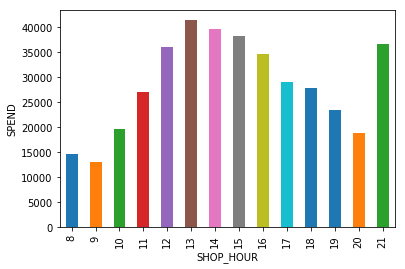

In [382]:
# Store 1 
s1hour = store1.groupby('SHOP_HOUR')['SPEND'].sum()
ax = s1hour.plot.bar()
ax.set_ylabel('SPEND')

Text(0,0.5,'SPEND')

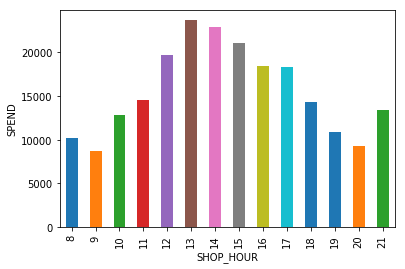

In [384]:
# Store 2
s2hour = store2.groupby('SHOP_HOUR')['SPEND'].sum()
ax = s2hour.plot.bar()
ax.set_ylabel('SPEND')

Text(0,0.5,'SPEND')

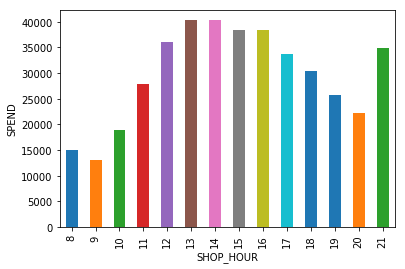

In [386]:
# Store 3
s3hour = store3.groupby('SHOP_HOUR')['SPEND'].sum()
ax = s3hour.plot.bar()
ax.set_ylabel('SPEND')

Text(0,0.5,'SPEND')

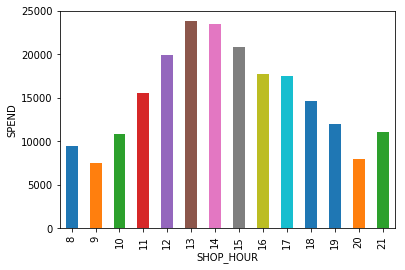

In [388]:
# Store 4
s4hour = store4.groupby('SHOP_HOUR')['SPEND'].sum()
ax = s4hour.plot.bar()
ax.set_ylabel('SPEND')

From this result, we can see that the most popular shopping hours seem to be from 13:00 - 14:59. This was actually a surprise because normally people would go to supermarkets after working hours. If I have to draw insights though, they might be buying stuff during lunch breaks in order to not create hassle and do it during 'rush' hours. 
Another interesting point is between 21:00 and 22:00, which is the last operating hour. The sales seem to have a spike up, indicating another good time to allocate campaigns.